In [ ]:
## Importing packages

# This R environment comes with all of CRAN and many other helpful packages preinstalled.
# You can see which packages are installed by checking out the kaggle/rstats docker image: 
# https://github.com/kaggle/docker-rstats

library(tidyverse) # metapackage with lots of helpful functions

## Running code

# In a notebook, you can run a single code cell by clicking in the cell and then hitting 
# the blue arrow to the left, or by clicking in the cell and pressing Shift+Enter. In a script, 
# you can run code by highlighting the code you want to run and then clicking the blue arrow
# at the bottom of this window.

## Reading in files

# You can access files from datasets you've added to this kernel in the "../input/" directory.
# You can see the files added to this kernel by running the code below. 

list.files(path = "../input")

## Saving data

# If you save any files or images, these will be put in the "output" directory. You 
# can see the output directory by committing and running your kernel (using the 
# Commit & Run button) and then checking out the compiled version of your kernel.

Linear regression is used to predict the value of an outcome variable Y 
based on one or more input predictor variables X.
The aim is to establish a linear relationship (a mathematical formula) 
between the predictor variable(s) and the response variable, 
so that, we can use this formula to estimate the value of the response Y, 
when only the predictors (Xs) values are known.

In [1]:
library(ggplot2)

In [2]:
trainingSet = read.csv('../input/train.csv')

In [4]:
str(trainingSet)

'data.frame':	700 obs. of  2 variables:
 $ x: num  24 50 15 38 87 36 12 81 25 5 ...
 $ y: num  21.5 47.5 17.2 36.6 87.3 ...


Check for NA and missing values
is.na return a vector with value TT for missing values.

In [5]:
numberOfNA = length(which(is.na(trainingSet)==T))
if(numberOfNA > 0) {
  cat('Number of missing values found: ', numberOfNA)
  cat('\nRemoving missing values...')
  trainingSet = trainingSet[complete.cases(trainingSet), ]
}

Number of missing values found:  1
Removing missing values...

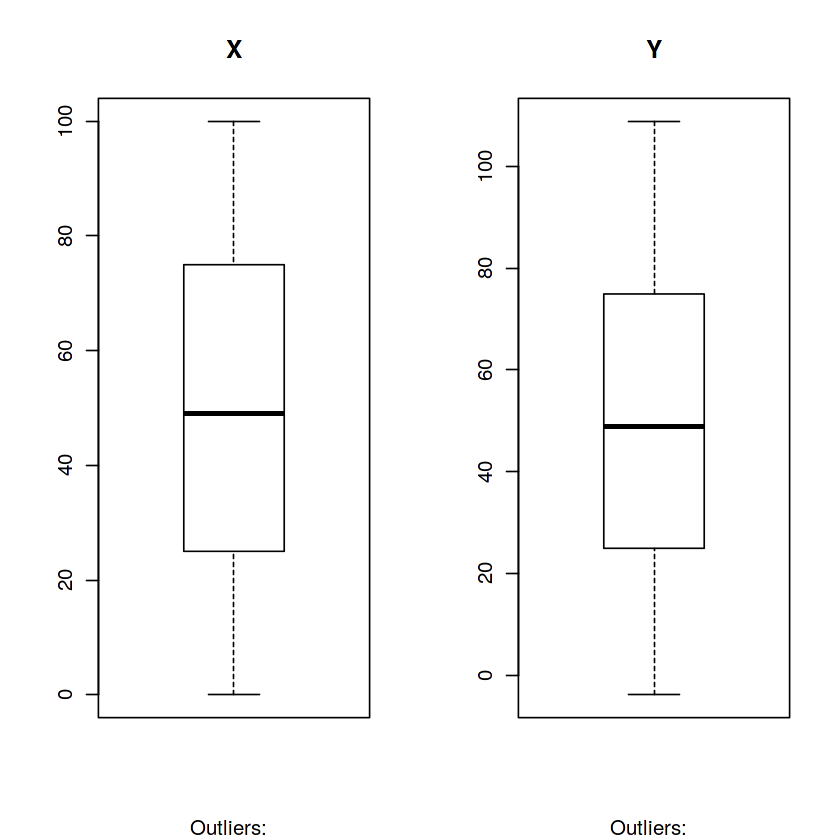

In [6]:
par(mfrow = c(1, 2))
# Boxplot for X
boxplot(trainingSet$x, main='X', sub=paste('Outliers: ', boxplot.stats(trainingSet$x)$out))
# Boxplot for Y
boxplot(trainingSet$y, main='Y', sub=paste('Outliers: ', boxplot.stats(trainingSet$y)$out))


 Both boxplots shows no outliers and distribution is not skewed.

Finding correlation
Correlation is a statistical measure that suggests the level of linear dependence between two variables, that occur in pair. 
Its value is between -1 to +1
Above 0 is positive correlation i.e. X is directly proportional to Y.
Below 0 is negative correlation i.e. X is inversly proportional to Y.
Value 0 suggests weak relation.

In [7]:
cor(trainingSet$x, trainingSet$y)

[1] 0.9953399

0.99 shows a very strong relation.

Fitting Simple Linear regression
. is used to fit predictor using all independent variables

In [20]:
regressor = lm(formula = y ~.,
               data = trainingSet)

In [9]:
summary(regressor)


Call:
lm(formula = y ~ ., data = trainingSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.1523 -2.0179  0.0325  1.8573  8.9132 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.107265   0.212170  -0.506    0.613    
x            1.000656   0.003672 272.510   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.809 on 697 degrees of freedom
Multiple R-squared:  0.9907,	Adjusted R-squared:  0.9907 
F-statistic: 7.426e+04 on 1 and 697 DF,  p-value: < 2.2e-16


In Linear Regression, the Null Hypothesis is that the coefficients associated with the variables is equal to zero. 
The alternate hypothesis is that the coefficients are not equal to zero 
(i.e. there exists a relationship between the independent variable in question and the dependent variable).
P value has 3 stars which means x is of very high statistical significance.
P value is less than 0. Genraaly below 0.05 is considered good.
R-Squared tells us is the proportion of variation in the dependent (response) variable that has been explained by this model.
R square is 0.99 which shows very good variation between dependent variable(y) and independent variable(x).

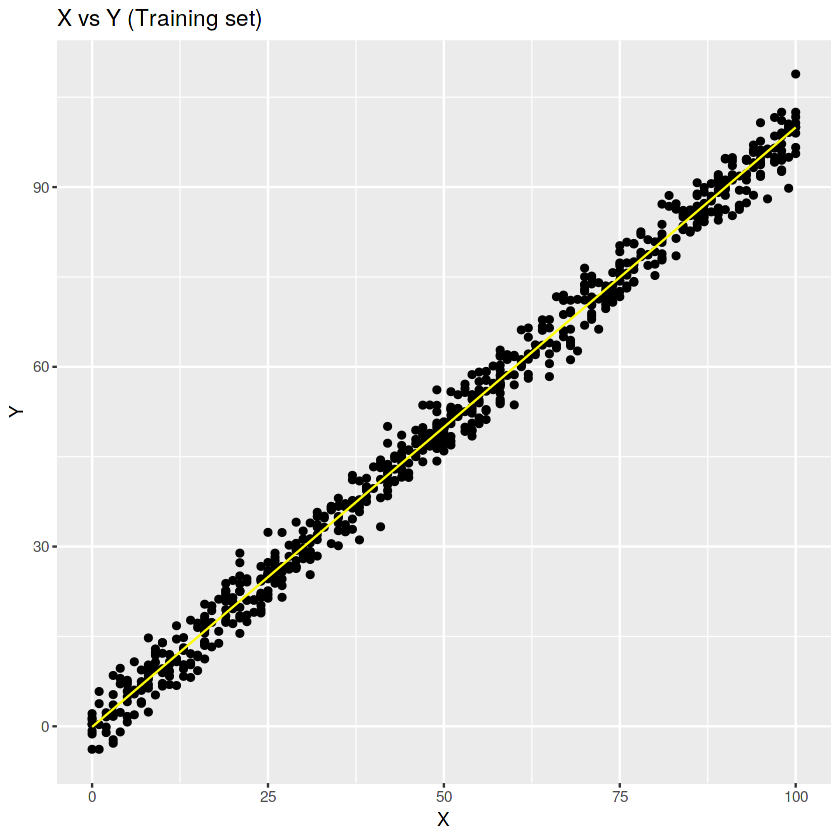

In [17]:
ggplot() +
  geom_point(aes(x = trainingSet$x, y = trainingSet$y),
             colour = 'black') +
  geom_line(aes(x = trainingSet$x, y = predict(regressor, newdata = trainingSet)),
            colour = 'yellow') +
  ggtitle('X vs Y (Training set)') +
  xlab('X') +
  ylab('Y')


Above plot shows there are no outliers.
It clearly shows there is a linear relationship between x and y which is continous in nature.

In [14]:
testSet = read.csv('../input/test.csv')
# Predicting the test results
y_pred = predict(regressor, newdata = testSet)

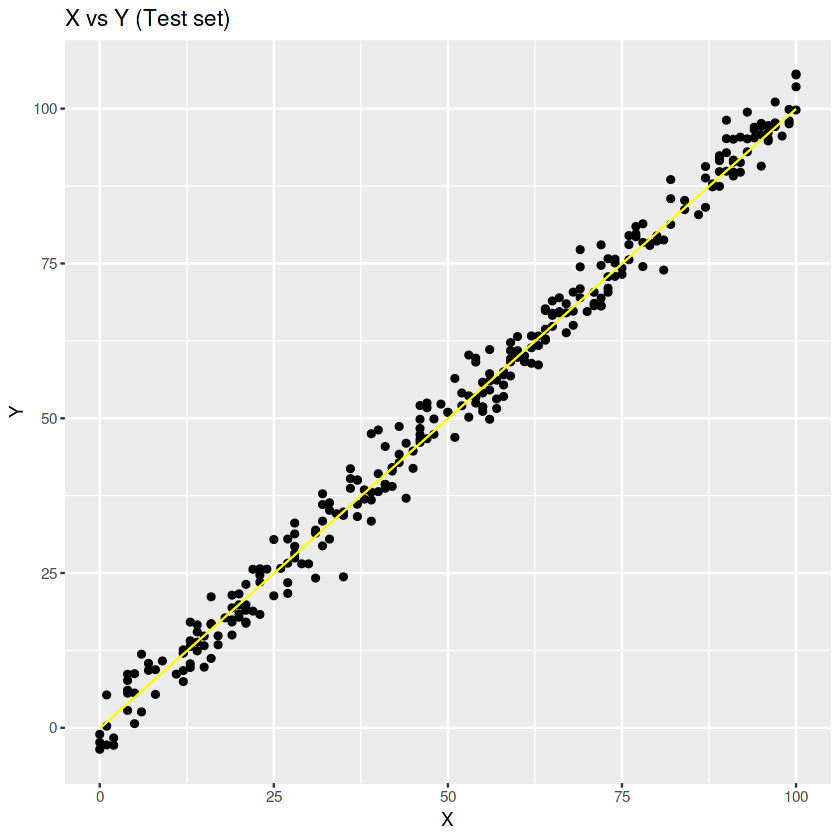

In [16]:
ggplot() +
  geom_point(aes(x = testSet$x, y = testSet$y),
             colour = 'black') +
  geom_line(aes(x = trainingSet$x, y = predict(regressor, newdata = trainingSet)),
            colour = 'yellow') +
  ggtitle('X vs Y (Test set)') +
  xlab('X') +
  ylab('Y')

In [18]:
compare <- cbind (actual=testSet$x, y_pred)  # combine actual and predicted
mean (apply(compare, 1, min)/apply(compare, 1, max))
mean(0.9,0.9,0.9,0.9)

[1] -Inf

[1] 0.9

[1] -1.930624e-18

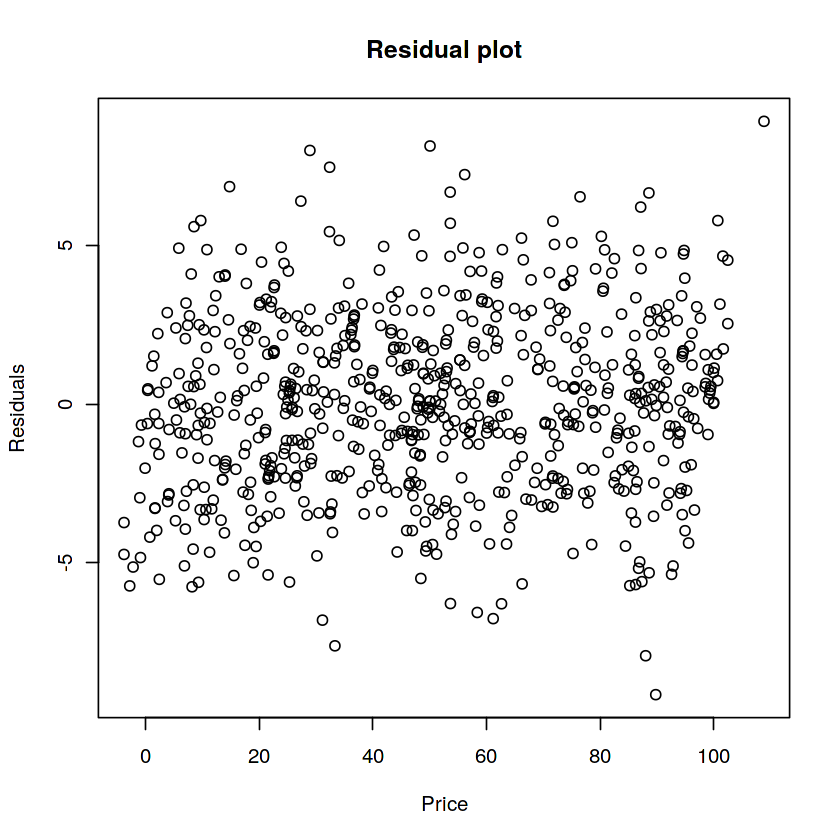

In [19]:
plot(trainingSet$y, resid(regressor), 
     ylab="Residuals", xlab="Price", 
     main="Residual plot") 
mean(regressor$residuals)